In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [10]:
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

In [22]:
train = datagen.flow_from_directory(
    "/content/drive/MyDrive/Datasets/4 CIFAR 10/cifar10_dataset",
    target_size=(32,32),
    class_mode="categorical",
    subset="training"
)

Found 48000 images belonging to 10 classes.


In [23]:
test = datagen.flow_from_directory(
    "/content/drive/MyDrive/Datasets/4 CIFAR 10/cifar10_dataset",
    target_size=(32,32),
    class_mode="categorical",
    subset="validation"
)

Found 12000 images belonging to 10 classes.


In [29]:
model = keras.Sequential([
    keras.layers.Input((32,32,3)),
    keras.layers.Flatten(),

    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,634 (6.67 MB)

 Trainable params: 1,748,634 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
classes = [x for x in train.class_indices.keys()]

In [35]:
report = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 259s 172ms/step - accuracy: 0.4202 - loss: 1.6326 - val_accuracy: 0.4311 - val_loss: 1.5890
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 257s 171ms/step - accuracy: 0.4421 - loss: 1.5632 - val_accuracy: 0.4266 - val_loss: 1.6201
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 273s 178ms/step - accuracy: 0.4581 - loss: 1.5196 - val_accuracy: 0.4644 - val_loss: 1.5135
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 254s 169ms/step - accuracy: 0.4726 - loss: 1.4756 - val_accuracy: 0.4684 - val_loss: 1.4961
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 292s 194ms/step - accuracy: 0.4842 - loss: 1.4418 - val_accuracy: 0.4751 - val_loss: 1.4843
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 260s 172ms/step - accuracy: 0.4959 - loss: 1.4123 - val_accuracy: 0.4829 - val_loss: 1.4564
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 245s 163ms/step - accuracy: 0.5109 - loss: 1.3773 - val_accuracy: 0.4899 - val_loss: 1.4553
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 237s 157ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


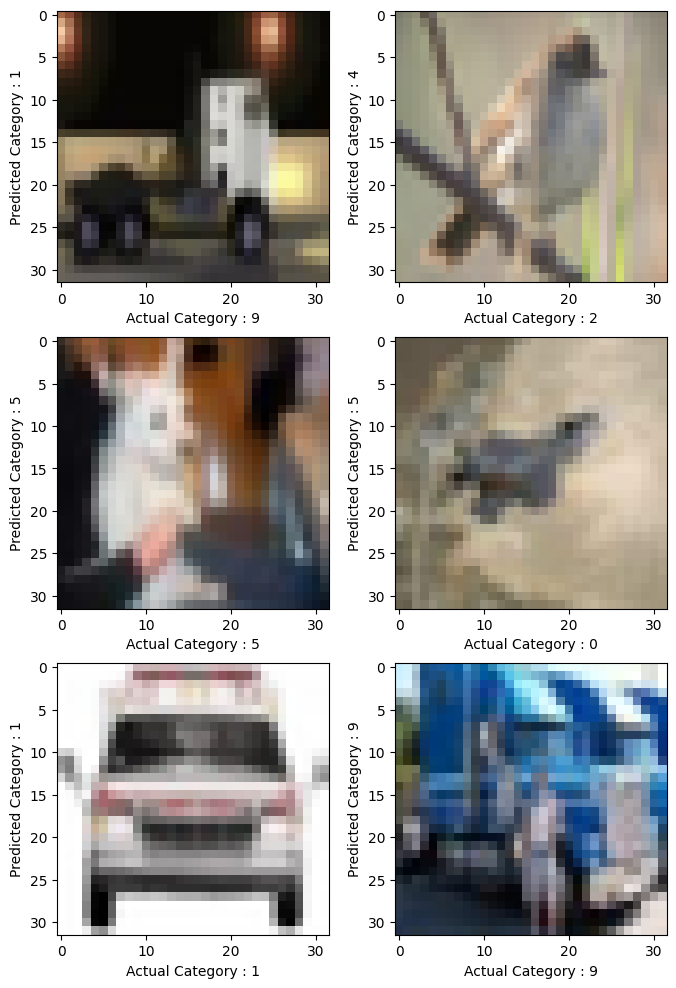

In [37]:
plt.figure(figsize=(8,12))
for x in range(6):
  plt.subplot(3,2,x + 1)
  plt.xlabel(f"Actual Category : {classes[np.argmax(test[0][1][x])]}")

  image = np.expand_dims(test[0][0][x], axis=0)
  plt.ylabel(f"Predicted Category : {classes[np.argmax(model.predict(image))]}")
  plt.imshow(test[0][0][x])

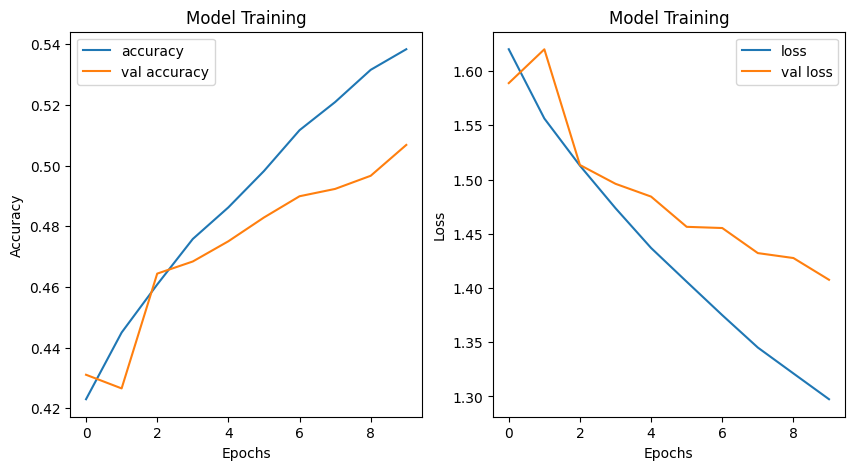

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(report.history["accuracy"], label="accuracy")
plt.plot(report.history["val_accuracy"], label="val accuracy")
plt.title("Model Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(report.history["loss"], label="loss")
plt.plot(report.history["val_loss"], label="val loss")
plt.title("Model Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
